In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import os
import matplotlib.pyplot as plt
from datetime import date, timedelta
import warnings
warnings.filterwarnings("ignore")

In [2]:
if os.path.exists("BAC.csv"):
    data_ = pd.read_csv("BAC.csv", index_col=0)
else:
    start = '2013-04-01'
    end = date.today() - timedelta(5)
    stock ='BAC'
    data_ = yf.download(stock,start,end)
data2 = data_.copy()
data_


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-04-01,12.150000,12.280000,12.100000,12.150000,10.021364,86281600
2013-04-02,12.240000,12.250000,12.140000,12.150000,10.021364,102626000
2013-04-03,12.120000,12.140000,11.720000,11.810000,9.740932,199765800
2013-04-04,11.810000,11.990000,11.720000,11.940000,9.848159,117831400
2013-04-05,11.670000,12.010000,11.640000,11.970000,9.872903,141061900
...,...,...,...,...,...,...
2023-12-18,33.709999,33.790001,33.410000,33.430000,33.430000,40694700
2023-12-19,33.029999,33.669998,32.799999,33.509998,33.509998,44534800
2023-12-20,33.380001,33.709999,32.950001,32.980000,32.980000,44711400


In [3]:
print(data_.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2704 entries, 2013-04-01 to 2023-12-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2704 non-null   float64
 1   High       2704 non-null   float64
 2   Low        2704 non-null   float64
 3   Close      2704 non-null   float64
 4   Adj Close  2704 non-null   float64
 5   Volume     2704 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 147.9 KB
None


In [4]:
data_= data_.drop(columns='Adj Close',axis=1)
data_

,Open,High,Low,Close,Volume
Date,,,,,
2013-04-01,12.150000,12.280000,12.100000,12.150000,86281600
2013-04-02,12.240000,12.250000,12.140000,12.150000,102626000
2013-04-03,12.120000,12.140000,11.720000,11.810000,199765800
2013-04-04,11.810000,11.990000,11.720000,11.940000,117831400
2013-04-05,11.670000,12.010000,11.640000,11.970000,141061900
...,...,...,...,...,...
2023-12-18,33.709999,33.790001,33.410000,33.430000,40694700
2023-12-19,33.029999,33.669998,32.799999,33.509998,44534800
2023-12-20,33.380001,33.709999,32.950001,32.980000,44711400


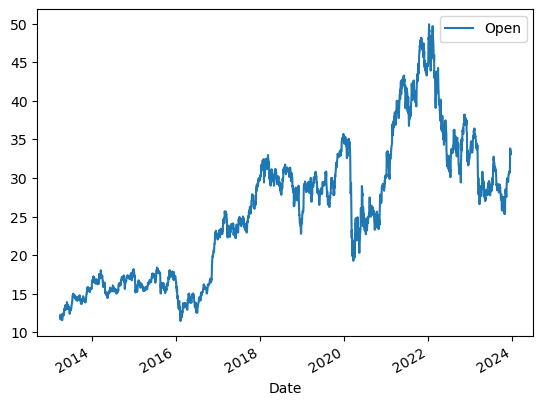

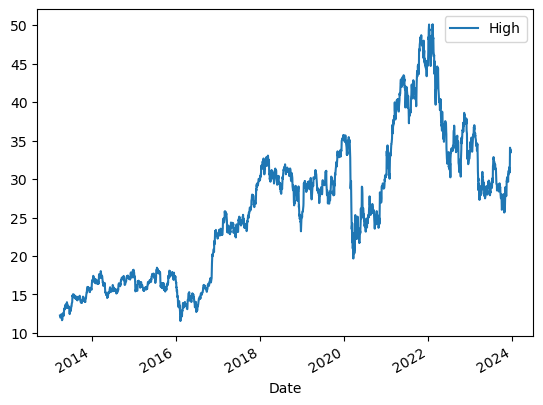

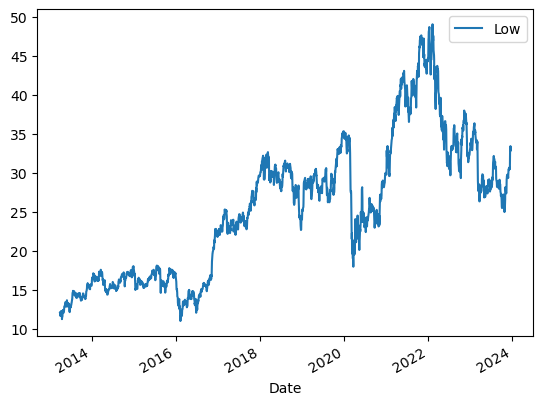

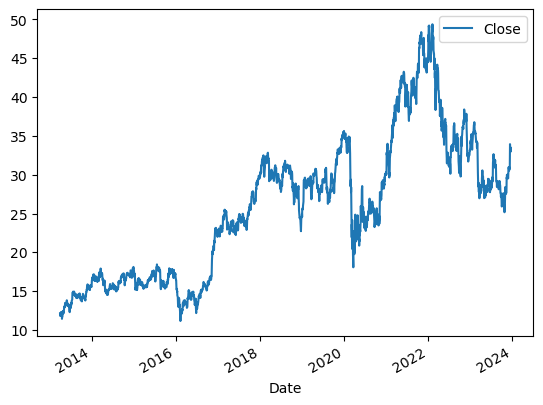

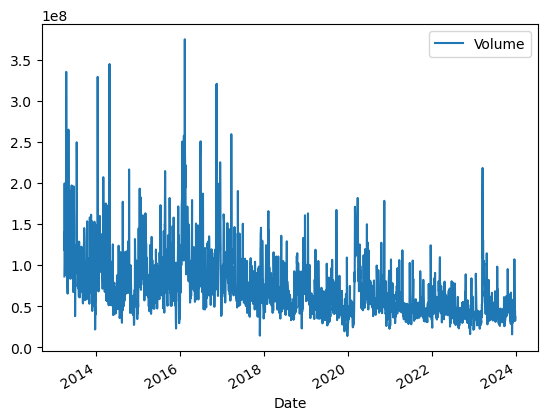

In [5]:
for x in data_.columns:
    data_.plot.line(y=x, use_index=True)

In [6]:
# Taking the last values of some data
ma_10_days = data_.Close.rolling(10).mean()
ma_100_days = data_.Close.rolling(100).mean()
ma_200_days = data_.Close.rolling(200).mean()


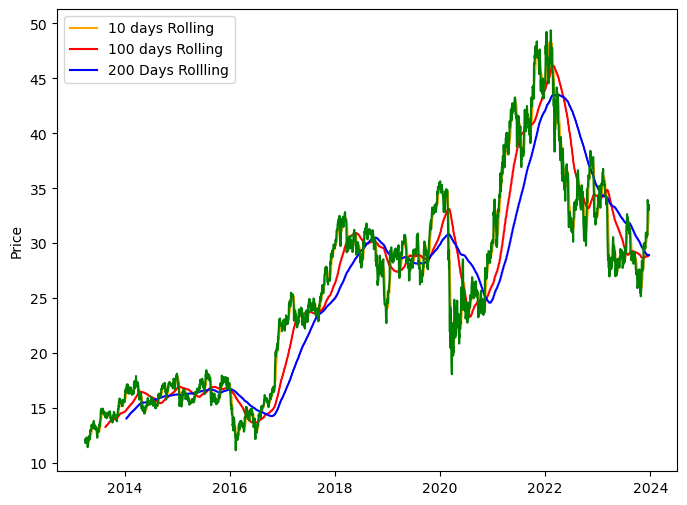

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_10_days, '#FFA500', label='10 days Rolling')
plt.plot(ma_100_days, 'r', label= '100 days Rolling')
plt.plot(ma_200_days,'b',label='200 Days Rollling')
plt.plot(data_['Close'],'g')
plt.ylabel('Price')
plt.legend()
plt.show()

In [8]:
data_['last_closing_value'] = data_['Close'].shift(-1)
data_

,Open,High,Low,Close,Volume,last_closing_value
Date,,,,,,
2013-04-01,12.150000,12.280000,12.100000,12.150000,86281600,12.150000
2013-04-02,12.240000,12.250000,12.140000,12.150000,102626000,11.810000
2013-04-03,12.120000,12.140000,11.720000,11.810000,199765800,11.940000
2013-04-04,11.810000,11.990000,11.720000,11.940000,117831400,11.970000
2013-04-05,11.670000,12.010000,11.640000,11.970000,141061900,12.210000
...,...,...,...,...,...,...
2023-12-18,33.709999,33.790001,33.410000,33.430000,40694700,33.509998
2023-12-19,33.029999,33.669998,32.799999,33.509998,44534800,32.980000
2023-12-20,33.380001,33.709999,32.950001,32.980000,44711400,33.200001


In [9]:
#Finding the missing values
missing_data = data_.isnull().sum().to_frame()

# Rename column holding the sums
missing_data = missing_data.rename(columns={0:'Empty Cells'})

# Print the results
print(missing_data)

                    Empty Cells
Open                          0
High                          0
Low                           0
Close                         0
Volume                        0
last_closing_value            1


In [10]:
# Drop null values from the DataFrame
# data_ = data_.dropna()

In [11]:
#Finding the missing values
missing_data = data_.isnull().sum().to_frame()
print(missing_data)
print('************************')
# Check for duplicate rows
duplicates = data_.duplicated()
# Count the number of duplicate rows
count_duplicates = duplicates.sum()
print("Number of duplicate rows:", count_duplicates)

                    0
Open                0
High                0
Low                 0
Close               0
Volume              0
last_closing_value  1
************************
Number of duplicate rows: 0


Open


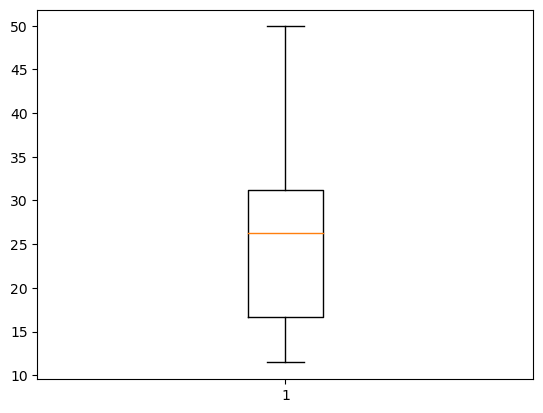

High


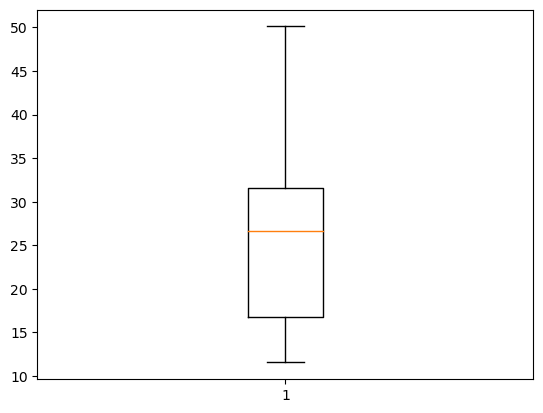

Low


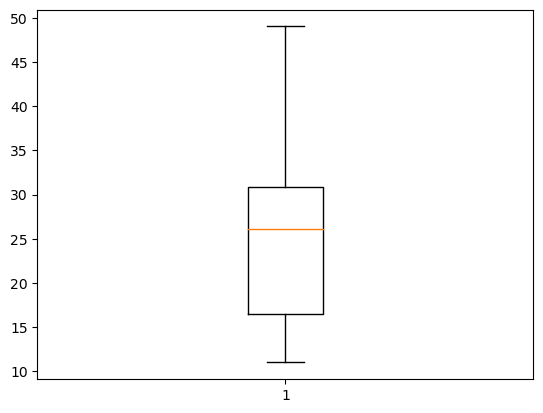

Close


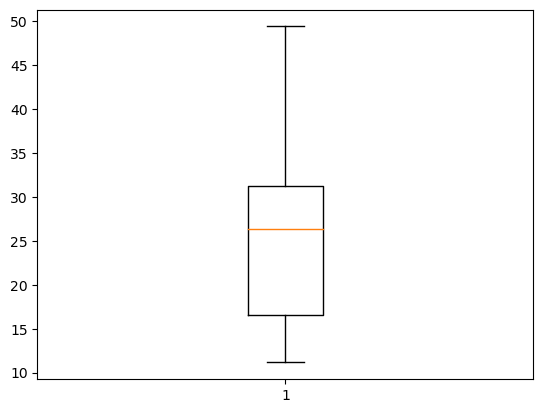

Volume


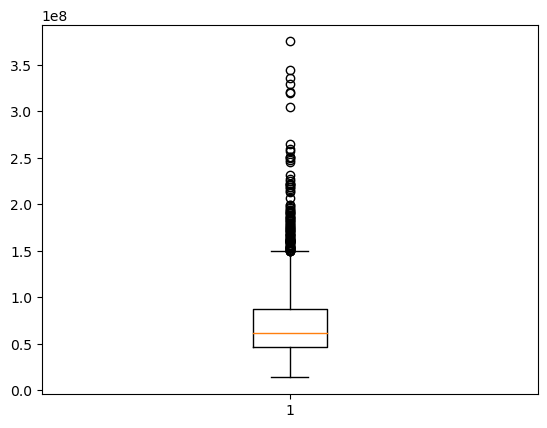

last_closing_value


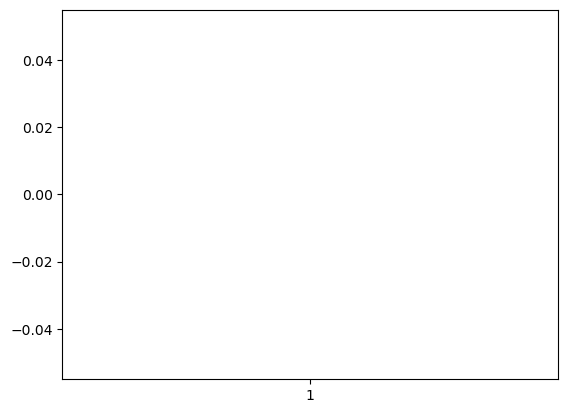

In [12]:
import matplotlib.pyplot as plt
for x in data_.columns:
    print(x)
    plt.boxplot(data_[x])
    plt.show()

Treating with IQR

In [13]:
# Calculate quartiles
q1 = data_['Volume'].quantile(0.25)
q3 = data_['Volume'].quantile(0.75)
# Calculate IQR (Interquartile Range)
iqr = q3 - q1
iqr

41392100.0

In [14]:
# Define outlier boundaries
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
print(lower_bound,upper_bound)
# Mark outliers based on the boundaries
data_['Is_Outlier_IQR'] = (data_['Volume'] < lower_bound) | (data_['Volume'] > upper_bound)
num_outliers_log = data_['Is_Outlier_IQR'].sum()
print("Outliers",num_outliers_log)
# Handle outliers according to your preference
# For example, replacing outliers with NaNs
data_.loc[data_['Is_Outlier_IQR'], 'Volume'] = np.nan
print(data_)

-15849975.0 149718425.0
Outliers 110
                 Open       High        Low      Close       Volume  \
Date                                                                  
2013-04-01  12.150000  12.280000  12.100000  12.150000   86281600.0   
2013-04-02  12.240000  12.250000  12.140000  12.150000  102626000.0   
2013-04-03  12.120000  12.140000  11.720000  11.810000          NaN   
2013-04-04  11.810000  11.990000  11.720000  11.940000  117831400.0   
2013-04-05  11.670000  12.010000  11.640000  11.970000  141061900.0   
...               ...        ...        ...        ...          ...   
2023-12-18  33.709999  33.790001  33.410000  33.430000   40694700.0   
2023-12-19  33.029999  33.669998  32.799999  33.509998   44534800.0   
2023-12-20  33.380001  33.709999  32.950001  32.980000   44711400.0   
2023-12-21  33.240002  33.450001  32.889999  33.200001   32325700.0   
2023-12-22  33.209999  33.669998  33.200001  33.430000   37258100.0   

            last_closing_value  Is_Outl

In [15]:
# Replace NaNs with mean or any chosen method for imputation
data_['Volume'].fillna(data_['Volume'].median(), inplace=True)
data_

,Open,High,Low,Close,Volume,last_closing_value,Is_Outlier_IQR
Date,,,,,,,
2013-04-01,12.150000,12.280000,12.100000,12.150000,86281600.0,12.150000,False
2013-04-02,12.240000,12.250000,12.140000,12.150000,102626000.0,11.810000,False
2013-04-03,12.120000,12.140000,11.720000,11.810000,60892200.0,11.940000,True
2013-04-04,11.810000,11.990000,11.720000,11.940000,117831400.0,11.970000,False
2013-04-05,11.670000,12.010000,11.640000,11.970000,141061900.0,12.210000,False
...,...,...,...,...,...,...,...
2023-12-18,33.709999,33.790001,33.410000,33.430000,40694700.0,33.509998,False
2023-12-19,33.029999,33.669998,32.799999,33.509998,44534800.0,32.980000,False
2023-12-20,33.380001,33.709999,32.950001,32.980000,44711400.0,33.200001,False


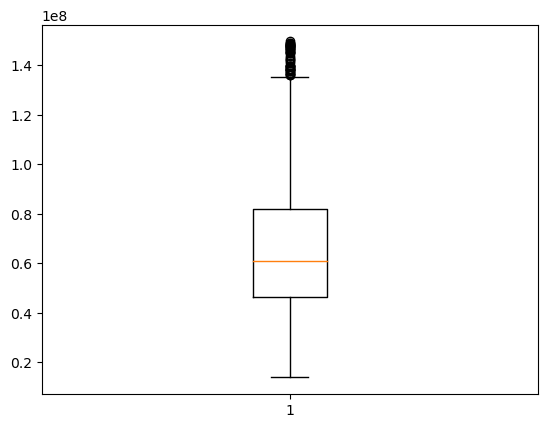

In [16]:
plt.boxplot(data_['Volume'])
plt.show()

Axes(0.125,0.11;0.62x0.77)


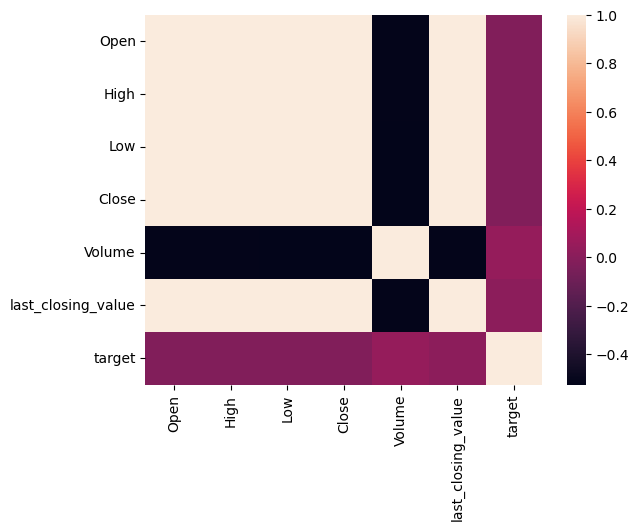

In [17]:
data_=data_.drop(columns='Is_Outlier_IQR',axis=1)
data_['target'] = (data_['last_closing_value']> data_['Close']).astype(int)
data_
import seaborn as sns
print(sns.heatmap(data_.corr()))

In [18]:
# input_df = data_.loc[:,data_.columns!=['target','last_closing_value']]
input_df = data_.loc[:,~data_.columns.isin(['target','last_closing_value'])]
print(input_df)

                 Open       High        Low      Close       Volume
Date                                                               
2013-04-01  12.150000  12.280000  12.100000  12.150000   86281600.0
2013-04-02  12.240000  12.250000  12.140000  12.150000  102626000.0
2013-04-03  12.120000  12.140000  11.720000  11.810000   60892200.0
2013-04-04  11.810000  11.990000  11.720000  11.940000  117831400.0
2013-04-05  11.670000  12.010000  11.640000  11.970000  141061900.0
...               ...        ...        ...        ...          ...
2023-12-18  33.709999  33.790001  33.410000  33.430000   40694700.0
2023-12-19  33.029999  33.669998  32.799999  33.509998   44534800.0
2023-12-20  33.380001  33.709999  32.950001  32.980000   44711400.0
2023-12-21  33.240002  33.450001  32.889999  33.200001   32325700.0
2023-12-22  33.209999  33.669998  33.200001  33.430000   37258100.0

[2704 rows x 5 columns]


In [19]:
target_df = data_[['target']]
target_df

,target
Date,
2013-04-01,0
2013-04-02,0
2013-04-03,1
2013-04-04,1
2013-04-05,1
...,...
2023-12-18,1
2023-12-19,0
2023-12-20,1


In [20]:
train_length = int(len(data_)*0.8)
train_ = data_[:train_length]
test_ = data_[train_length:]
train_.shape[0]

2163

In [21]:
test_.shape[0]

541

In [22]:
x_train = train_[input_df.columns]
print(x_train.describe())
x_train

              Open         High          Low        Close        Volume
count  2163.000000  2163.000000  2163.000000  2163.000000  2.163000e+03
mean     23.485377    23.728017    23.242834    23.487545  7.134083e+07
std       8.183035     8.267589     8.108833     8.189924  2.640981e+07
min      11.460000    11.550000    10.990000    11.160000  1.380540e+07
25%      16.000000    16.150000    15.810000    16.000000  5.159735e+07
50%      23.440001    23.770000    23.200001    23.469999  6.501720e+07
75%      29.330000    29.605000    29.020000    29.335000  8.807890e+07
max      47.799999    48.430000    47.439999    47.959999  1.496454e+08


,Open,High,Low,Close,Volume
Date,,,,,
2013-04-01,12.150000,12.280000,12.100000,12.150000,86281600.0
2013-04-02,12.240000,12.250000,12.140000,12.150000,102626000.0
2013-04-03,12.120000,12.140000,11.720000,11.810000,60892200.0
2013-04-04,11.810000,11.990000,11.720000,11.940000,117831400.0
2013-04-05,11.670000,12.010000,11.640000,11.970000,141061900.0
...,...,...,...,...,...
2021-10-22,46.990002,47.619999,46.990002,47.570000,36225600.0
2021-10-25,47.799999,47.980000,47.200001,47.509998,31679500.0
2021-10-26,47.660000,48.430000,47.439999,47.959999,35674800.0


In [23]:
y_train= train_[target_df.columns]
y_train

,target
Date,
2013-04-01,0
2013-04-02,0
2013-04-03,1
2013-04-04,1
2013-04-05,1
...,...
2021-10-22,0
2021-10-25,1
2021-10-26,0


In [24]:
x_test=test_[input_df.columns]
x_test

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-29,47.750000,48.130001,47.520000,47.779999,31756200.0
2021-11-01,48.099998,48.169998,47.279999,47.849998,36937200.0
2021-11-02,47.570000,48.419998,47.349998,47.880001,36283400.0
2021-11-03,47.799999,48.689999,47.610001,48.369999,42553000.0
2021-11-04,48.150002,48.150002,46.880001,47.330002,47646300.0
...,...,...,...,...,...
2023-12-18,33.709999,33.790001,33.410000,33.430000,40694700.0
2023-12-19,33.029999,33.669998,32.799999,33.509998,44534800.0
2023-12-20,33.380001,33.709999,32.950001,32.980000,44711400.0


In [25]:
y_test=test_[target_df.columns]
y_test

,target
Date,
2021-10-29,1
2021-11-01,1
2021-11-02,1
2021-11-03,0
2021-11-04,0
...,...
2023-12-18,1
2023-12-19,0
2023-12-20,1


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score

In [27]:
from sklearn.ensemble import RandomForestClassifier
import time
start_time = time.time()
rfclass = RandomForestClassifier(n_estimators=100,random_state=1,min_samples_split=10)
rfclass.fit(x_train,y_train)

RandomForestClassifier(min_samples_split=10, random_state=1)

In [28]:
# Stop the timer
end_time = time.time()
# Calculate the time it took to build the model
elapsed_time = end_time - start_time

print(f"Time to build the Decision Tree model: {elapsed_time:.4f} seconds")

Time to build the Decision Tree model: 0.9472 seconds


In [29]:
#Making predictions on the test set
y_pred = rfclass.predict(x_test)
y_pred = pd.Series(y_pred,index=test_.index,name="Predictions")
y_pred

Date
2021-10-29    0
2021-11-01    0
2021-11-02    0
2021-11-03    0
2021-11-04    1
             ..
2023-12-18    1
2023-12-19    1
2023-12-20    1
2023-12-21    0
2023-12-22    1
Name: Predictions, Length: 541, dtype: int32

In [30]:
precision_score(y_test,y_pred)

0.4794007490636704

In [31]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.5175600739371534

In [32]:
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.55      0.52      0.54       291
           1       0.48      0.51      0.50       250

    accuracy                           0.52       541
   macro avg       0.52      0.52      0.52       541
weighted avg       0.52      0.52      0.52       541



In [33]:
combining_both = pd.concat([y_test,y_pred],axis=1)


<Axes: xlabel='Date'>

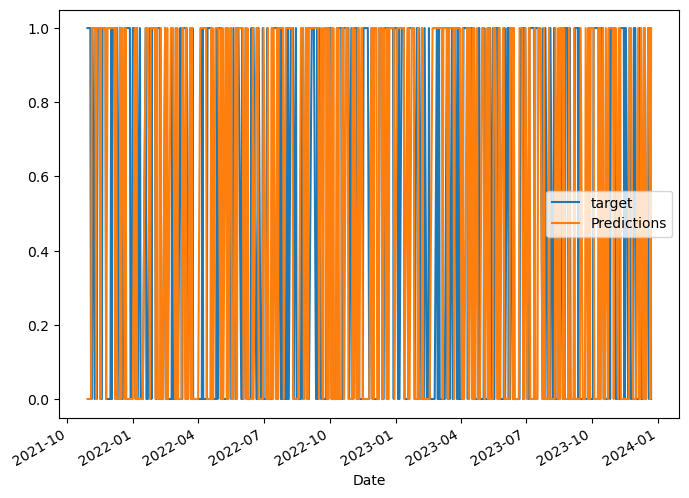

In [34]:
combining_both.plot(figsize=(8,6))

In [35]:
horizons = [2,5,20,60,250,750,1250]
new_predictors = []

for horizon in horizons:
    rolling_averages = data_.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    data_[ratio_column] = data_["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    data_[trend_column] = data_.shift(1).rolling(horizon).sum()["target"]
    
    new_predictors+= [ratio_column, trend_column]

In [36]:
data_

,Open,High,Low,Close,Volume,last_closing_value,target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,Close_Ratio_20,Trend_20,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_750,Trend_750,Close_Ratio_1250,Trend_1250
Date,,,,,,,,,,,,,,,,,,,,,
2013-04-01,12.150000,12.280000,12.100000,12.150000,86281600.0,12.150000,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-02,12.240000,12.250000,12.140000,12.150000,102626000.0,11.810000,0,1.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-03,12.120000,12.140000,11.720000,11.810000,60892200.0,11.940000,1,0.985810,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-04,11.810000,11.990000,11.720000,11.940000,117831400.0,11.970000,1,1.005474,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-04-05,11.670000,12.010000,11.640000,11.970000,141061900.0,12.210000,1,1.001255,2.0,0.997168,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,33.709999,33.790001,33.410000,33.430000,40694700.0,33.509998,1,0.997464,0.0,1.020763,...,1.081825,9.0,1.177887,31.0,1.113311,121.0,0.931500,365.0,1.022415,626.0
2023-12-19,33.029999,33.669998,32.799999,33.509998,44534800.0,32.980000,0,1.001195,1.0,1.006185,...,1.078307,9.0,1.176622,32.0,1.115779,121.0,0.933606,366.0,1.024647,626.0
2023-12-20,33.380001,33.709999,32.950001,32.980000,44711400.0,33.200001,1,0.992029,1.0,0.984713,...,1.055613,9.0,1.154088,32.0,1.098087,120.0,0.918742,365.0,1.008234,626.0


In [37]:
data_ = data_.dropna(subset=data_.columns[data_.columns != "last_closing_value"])
data_

,Open,High,Low,Close,Volume,last_closing_value,target,Close_Ratio_2,Trend_2,Close_Ratio_5,...,Close_Ratio_20,Trend_20,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_750,Trend_750,Close_Ratio_1250,Trend_1250
Date,,,,,,,,,,,,,,,,,,,,,
2018-03-16,32.110001,32.570000,32.080002,32.169998,83447600.0,31.980000,0,1.001089,1.0,0.995297,...,1.001557,9.0,1.027451,36.0,1.221342,123.0,1.609066,380.0,1.771600,632.0
2018-03-19,32.130001,32.220001,31.680000,31.980000,57363200.0,31.980000,0,0.997038,1.0,0.994712,...,0.995626,9.0,1.020009,36.0,1.212479,123.0,1.597798,379.0,1.759599,632.0
2018-03-20,32.060001,32.200001,31.879999,31.980000,44784500.0,31.870001,0,1.000000,0.0,0.997069,...,0.995548,9.0,1.018655,35.0,1.210819,123.0,1.596026,379.0,1.758038,632.0
2018-03-21,32.000000,32.450001,31.680000,31.870001,64546300.0,30.549999,0,0.998277,0.0,0.995315,...,0.992124,9.0,1.014048,34.0,1.205048,122.0,1.588808,378.0,1.750457,631.0
2018-03-22,31.440001,31.490000,30.420000,30.549999,110271900.0,29.170000,0,0.978853,0.0,0.963418,...,0.952722,9.0,0.971702,33.0,1.153840,121.0,1.521469,378.0,1.676587,630.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-18,33.709999,33.790001,33.410000,33.430000,40694700.0,33.509998,1,0.997464,0.0,1.020763,...,1.081825,9.0,1.177887,31.0,1.113311,121.0,0.931500,365.0,1.022415,626.0
2023-12-19,33.029999,33.669998,32.799999,33.509998,44534800.0,32.980000,0,1.001195,1.0,1.006185,...,1.078307,9.0,1.176622,32.0,1.115779,121.0,0.933606,366.0,1.024647,626.0
2023-12-20,33.380001,33.709999,32.950001,32.980000,44711400.0,33.200001,1,0.992029,1.0,0.984713,...,1.055613,9.0,1.154088,32.0,1.098087,120.0,0.918742,365.0,1.008234,626.0


In [38]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=70, random_state=1)

In [39]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.60] = 1
    preds[preds <.60] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [40]:
def backtest(data, model, predictors, start=250, step=80):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        print(train[predictors])
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [41]:
predictions = backtest(data_, model, new_predictors)

            Close_Ratio_2  Trend_2  Close_Ratio_5  Trend_5  Close_Ratio_20  \
Date                                                                         
2018-03-16       1.001089      1.0       0.995297      2.0        1.001557   
2018-03-19       0.997038      1.0       0.994712      1.0        0.995626   
2018-03-20       1.000000      0.0       0.997069      1.0        0.995548   
2018-03-21       0.998277      0.0       0.995315      1.0        0.992124   
2018-03-22       0.978853      0.0       0.963418      1.0        0.952722   
...                   ...      ...            ...      ...             ...   
2019-03-08       1.001748      1.0       0.993756      2.0        0.989415   
2019-03-11       1.005036      2.0       1.004443      3.0        0.998310   
2019-03-12       1.000000      1.0       1.005420      2.0        0.997398   
2019-03-13       1.006011      1.0       1.014407      3.0        1.008418   
2019-03-14       1.002894      2.0       1.013904      4.0      

In [42]:
predictions["Predictions"].value_counts()

0.0    995
1.0    209
Name: Predictions, dtype: int64

In [43]:
precision_score(predictions["target"], predictions["Predictions"])

0.5311004784688995

In [44]:
# Evaluate the model
accuracy = accuracy_score(predictions["target"], predictions["Predictions"])
accuracy

0.5124584717607974

In [45]:
predictions["target"].value_counts() / predictions.shape[0]

0    0.501661
1    0.498339
Name: target, dtype: float64

            target  Predictions
Date                           
2019-03-15       1          0.0
2019-03-18       0          0.0
2019-03-19       0          0.0
2019-03-20       0          0.0
2019-03-21       0          0.0
...            ...          ...
2023-12-18       1          0.0
2023-12-19       0          0.0
2023-12-20       1          0.0
2023-12-21       1          0.0
2023-12-22       0          0.0

[1204 rows x 2 columns]


<Axes: xlabel='Date'>

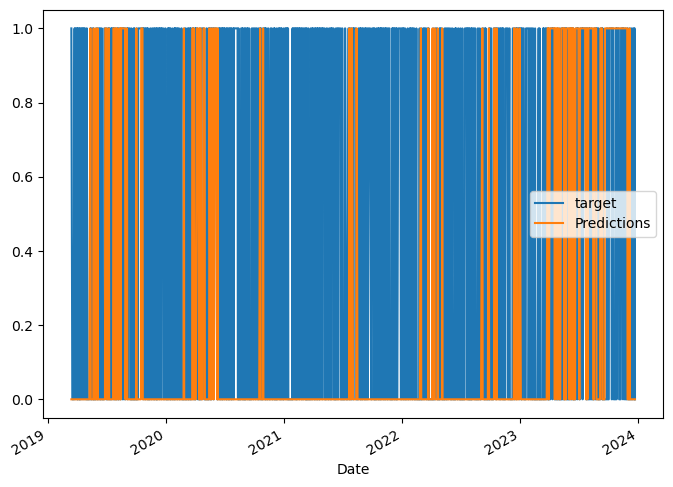

In [46]:
print(predictions)
predictions.plot(figsize=(8,6))


In [47]:
classification_rep = classification_report(predictions["target"], predictions["Predictions"])
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.84      0.63       604
           1       0.53      0.18      0.27       600

    accuracy                           0.51      1204
   macro avg       0.52      0.51      0.45      1204
weighted avg       0.52      0.51      0.45      1204



Building ARIMA model

In [48]:
data_ = data2['Open'].copy()
data_

Date
2013-04-01    12.150000
2013-04-02    12.240000
2013-04-03    12.120000
2013-04-04    11.810000
2013-04-05    11.670000
                ...    
2023-12-18    33.709999
2023-12-19    33.029999
2023-12-20    33.380001
2023-12-21    33.240002
2023-12-22    33.209999
Name: Open, Length: 2704, dtype: float64

In [49]:
data_.describe()

count    2704.000000
mean       25.717204
std         9.019593
min        11.460000
25%        16.612501
50%        26.285000
75%        31.222499
max        49.910000
Name: Open, dtype: float64

###ADF Test

In [50]:
# Prepare the data
train_length = int(len(data_)*0.85)
train_ = data_[:train_length]
test_ = data_[train_length:]
train_

Date
2013-04-01    12.150000
2013-04-02    12.240000
2013-04-03    12.120000
2013-04-04    11.810000
2013-04-05    11.670000
                ...    
2022-05-06    37.369999
2022-05-09    36.869999
2022-05-10    36.750000
2022-05-11    35.900002
2022-05-12    35.009998
Name: Open, Length: 2298, dtype: float64

In [51]:
print(test_)
test_.shape[0]


Date
2022-05-13    35.529999
2022-05-16    35.000000
2022-05-17    35.619999
2022-05-18    35.619999
2022-05-19    34.290001
                ...    
2023-12-18    33.709999
2023-12-19    33.029999
2023-12-20    33.380001
2023-12-21    33.240002
2023-12-22    33.209999
Name: Open, Length: 406, dtype: float64


406

In [52]:
train_.shape[0]

2298

In [53]:
from statsmodels.tsa.stattools import adfuller

result_ = adfuller(train_.dropna())
print("ADF statistics", result_[0])
print('p-value',result_[1])

ADF statistics -1.3932912009441698
p-value 0.5854881415233255


Autocorrelation Function (ACF)

In [54]:
from statsmodels.graphics.tsaplots import plot_acf

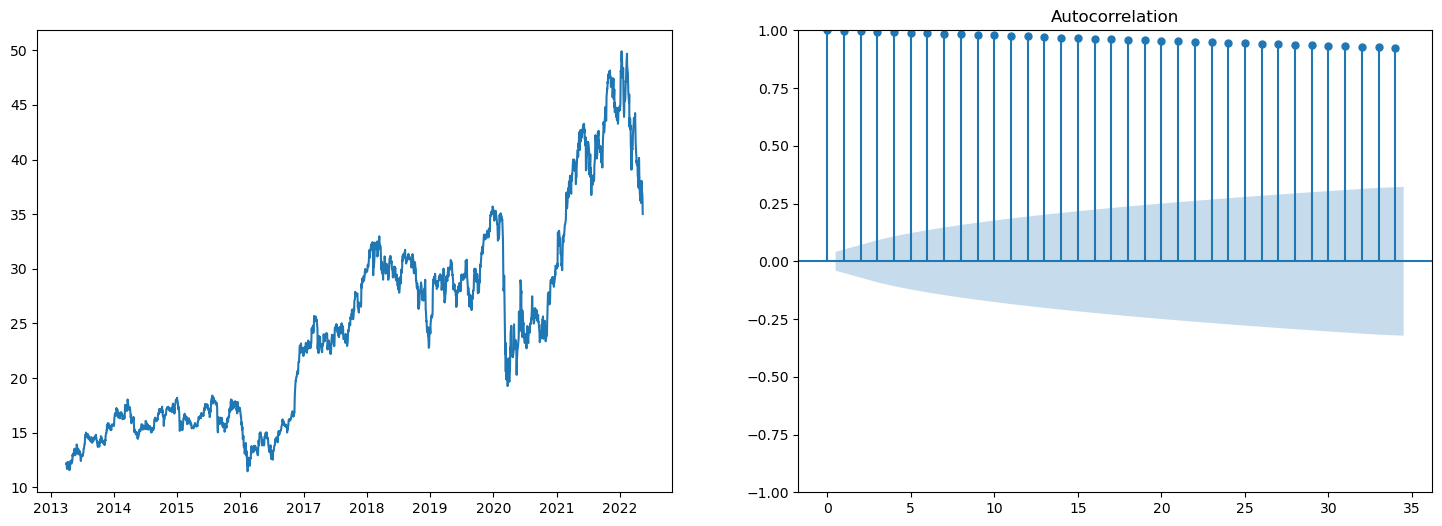

In [55]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.plot(train_)
plot_acf(train_,ax=ax2);

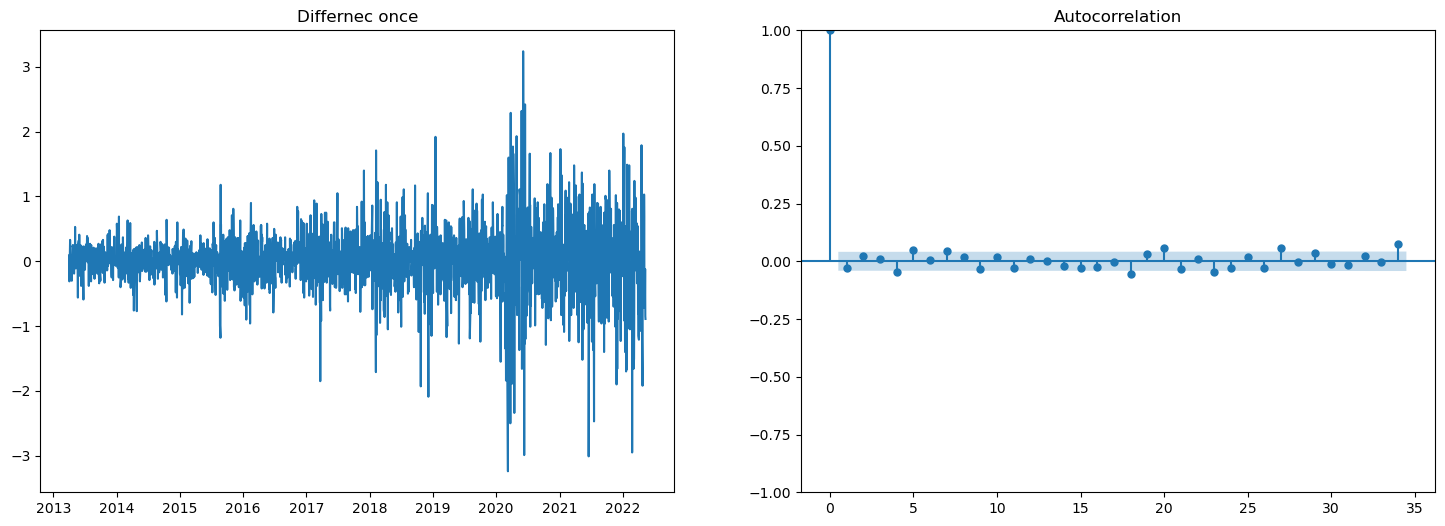

In [56]:
difference_ = train_.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.plot(difference_)
ax1.set_title('Differnec once')
plot_acf(difference_,ax=ax2);

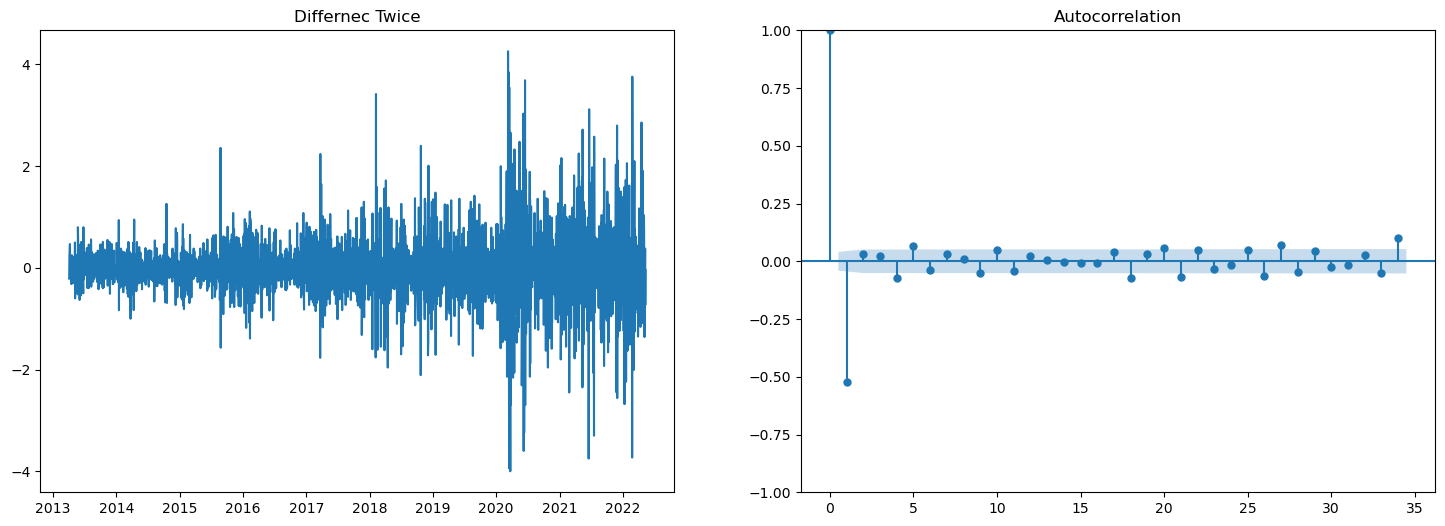

In [57]:
difference_ = train_.diff().diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.plot(difference_)
ax1.set_title('Differnec Twice')
plot_acf(difference_,ax=ax2);

In [58]:
# From fig we can see on differnce 1 and 2 there is no differnce. Only lag differenbce is there. But using pmdarima package for 100% clarity
from pmdarima.arima.utils import ndiffs

In [59]:
ndiffs(train_,test='adf')

1

#Calculate the p-value

In [60]:
from statsmodels.graphics.tsaplots import plot_pacf

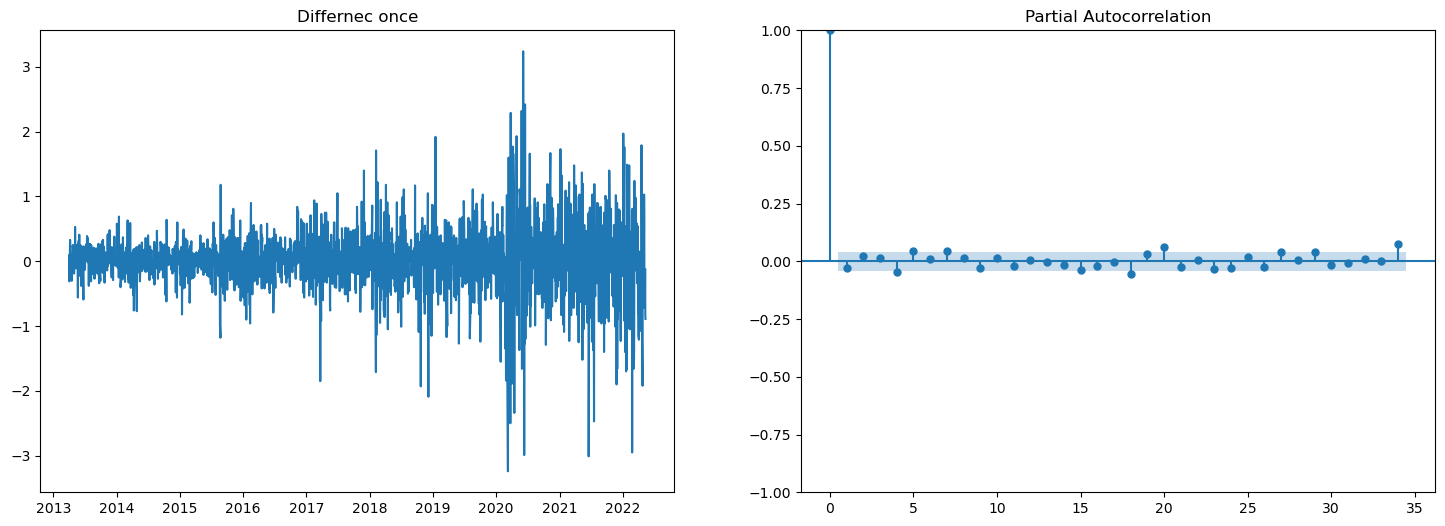

In [61]:
difference_ = train_.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.plot(difference_)
ax1.set_title('Differnec once')
# ax2.set_ylim(0,1)
plot_pacf(difference_,ax=ax2);   #4

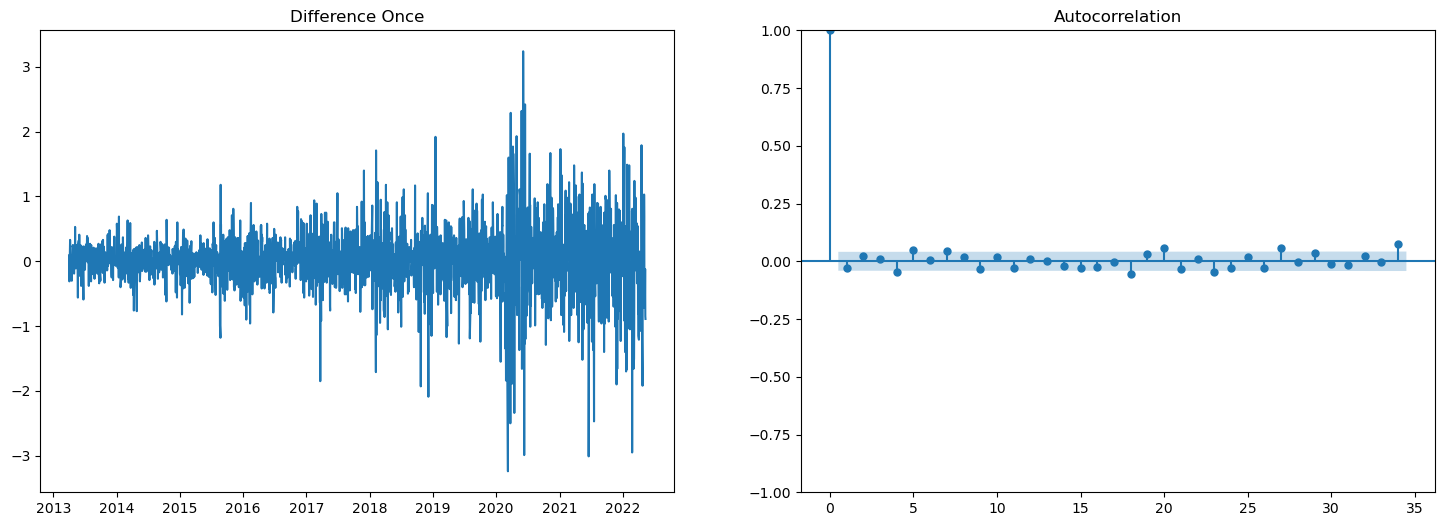

In [62]:
# Calculate the q value

difference_ = train_.diff().dropna()
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(18,6))
ax1.plot(difference_)
ax1.set_title('Difference Once')
# ax2.set_ylim(0,1)
plot_acf(difference_,ax=ax2);

Building ARIMA model

In [63]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [64]:
#order = p,d,q
model_ = sm.tsa.arima.ARIMA(train_, order=(5,1,1))
result_ = model_.fit()

c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [65]:
print(result_.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 2298
Model:                 ARIMA(5, 1, 1)   Log Likelihood               -1631.364
Date:                Sat, 30 Dec 2023   AIC                           3276.727
Time:                        00:04:52   BIC                           3316.903
Sample:                             0   HQIC                          3291.376
                               - 2298                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5330      0.154      3.462      0.001       0.231       0.835
ar.L2          0.0376      0.015      2.430      0.015       0.007       0.068
ar.L3         -0.0028      0.014     -0.195      0.8

<Axes: ylabel='Density'>

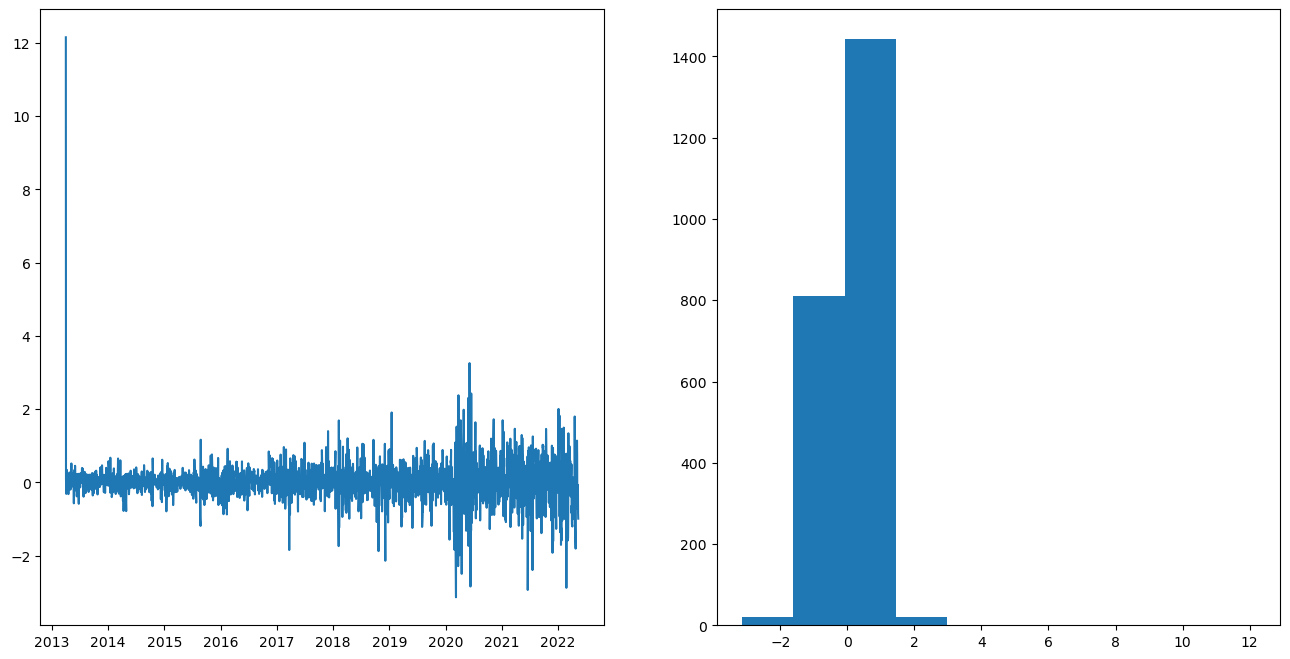

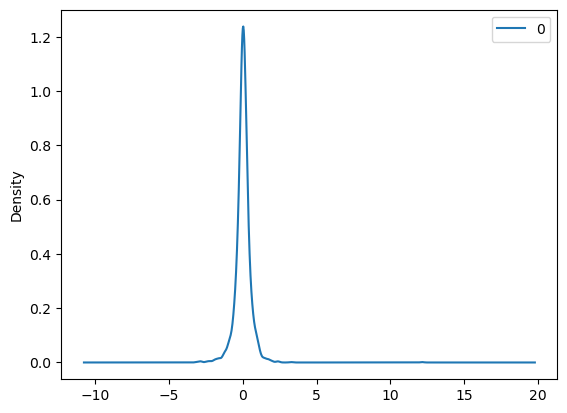

In [66]:
residuals = pd.DataFrame(result_.resid)

fig,(ax1,ax2) = plt.subplots(1,2,figsize=(16,8))
ax1.plot(residuals)
ax2.hist(residuals) 
residuals.plot(kind='kde')

In [67]:
residuals.describe()

,0
count,2298.000000
mean,0.014470
std,0.553523
min,-3.137696
25%,-0.187979
50%,0.016027
75%,0.226854
max,12.150000


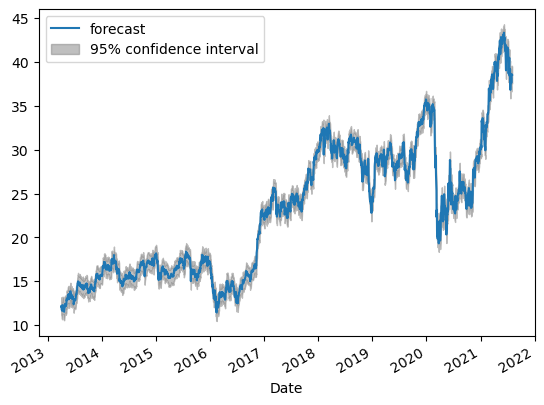

In [68]:
plot_predict(result_,start=1,end=2100,dynamic=False);

In [69]:
# Make predictions
predictions = result_.predict(start=len(train_), end=len(train_)+len(test_)-1,dynamic=False)

predictions

c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


2298    35.034479
2299    34.986478
2300    34.998631
2301    34.987011
2302    34.916075
          ...    
2699    34.815031
2700    34.815031
2701    34.815031
2702    34.815031
2703    34.815031
Name: predicted_mean, Length: 406, dtype: float64

In [70]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

mae = mean_absolute_error(test_, predictions)
mape = mean_absolute_percentage_error(test_, predictions)
rmse = np.sqrt(mean_squared_error(test_, predictions))

print(f'mae - manual: {mae}')
print(f'mape - manual: {mape}')
print(f'rmse - manual: {rmse}')

mae - manual: 3.7534497697219678
mape - manual: 0.1278074109378929
rmse - manual: 4.5361377254479684


In [71]:
forecast_test_ = predictions.mean()
print(forecast_test_)

34.81767122304058


In [72]:
close_value = data2.Close[-1]
print(close_value)

print("Close value Mean Value",close_value)

33.43000030517578
Close value Mean Value 33.43000030517578


In [73]:
predicted_opening_price = forecast_test_
print("Predicted Opening Price Mean value ", predicted_opening_price)
print("Closing mean value for different scenario",close_value)
if predicted_opening_price > close_value:
    print("The market will open High")
else:
    print("The market will open low")
# # predicted_opening_price = forecast2.predicted_mean[0]

Predicted Opening Price Mean value  34.81767122304058
Closing mean value for different scenario 33.43000030517578
The market will open High


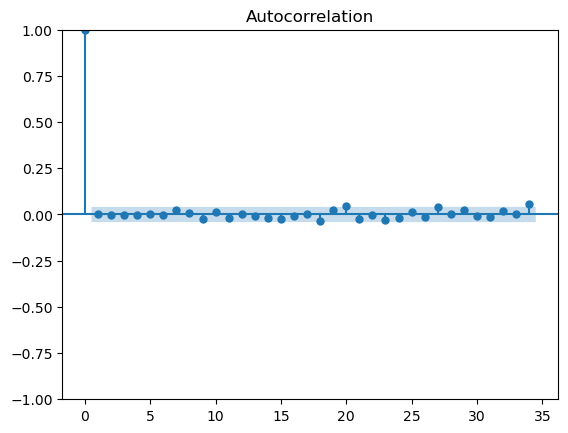

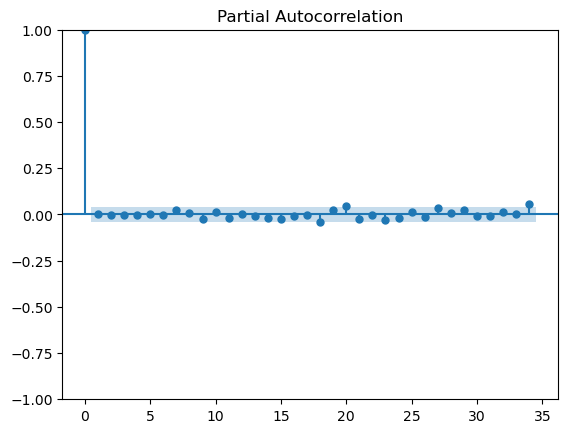

In [74]:
acf_res = plot_acf(residuals)
pacf_res = plot_pacf(residuals)

In [75]:
#Auto-fit Arima Model

import pmdarima as pm
auto_arima = pm.auto_arima(train_, stepwise=False, seasonal=False,m=5,trace=True)
auto_arima_fit = auto_arima.fit(train_)

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3280.995, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3281.323, Time=0.37 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3282.000, Time=0.36 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=3283.913, Time=0.39 sec
 ARIMA(0,1,4)(0,0,0)[0] intercept   : AIC=3281.385, Time=0.68 sec
 ARIMA(0,1,5)(0,0,0)[0] intercept   : AIC=3278.908, Time=0.97 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3281.248, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3282.872, Time=0.67 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3284.518, Time=0.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=3282.004, Time=2.66 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=3280.334, Time=2.59 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3282.167, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3283.956, Time=1.51 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3253.101, Time=2.91 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=3255.136, Time=4.34 sec
 ARIMA(3,1

In [76]:
order = auto_arima_fit.order
print(order)
seasonal_order = auto_arima_fit.seasonal_order
model_ = sm.tsa.arima.ARIMA(train_, order=order, seasonal_order=seasonal_order)
result_ = model_.fit()

(2, 1, 2)


c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [77]:
result_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Open   No. Observations:                 2298
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1621.032
Date:                Sat, 30 Dec 2023   AIC                           3252.064
Time:                        00:05:28   BIC                           3280.761
Sample:                             0   HQIC                          3262.527
                               - 2298                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6868      0.007   -231.982      0.000      -1.701      -1.673
ar.L2         -0.9823      0.007   -135.070      0.000      -0.997      -0.968
ma.L1          1.6769      0.010    163.086      0.000       1.657       1.697
ma.L2          0.9623      0.010     94.947      0.000       0.942       0.982
sigma2         0.2401      0.004     65.246      0.000       0.233       0.247
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):              3582.18
Prob(Q):                              0.82   Prob(JB):                         0.00
Heteroskedasticity (H):               8.29   Skew:                            -0.49
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
forecast_test_auto = result_.predict(start=len(train_), end=len(train_)+len(test_)-1,dynamic=False)
print(forecast_test_auto)

2298    35.040073
2299    34.930669
2300    35.085667
2301    34.931685
2302    35.039169
          ...    
2699    35.000441
2700    35.002882
2701    35.002791
2702    35.000546
2703    35.004422
Name: predicted_mean, Length: 406, dtype: float64


c:\Users\shast\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [79]:
mae = mean_absolute_error(test_, forecast_test_auto)
mape = mean_absolute_percentage_error(test_, forecast_test_auto)
rmse = np.sqrt(mean_squared_error(test_, forecast_test_auto))

print(f'mae - auto: {mae}')
print(f'mape - auto: {mape}')
print(f'rmse - auto: {rmse}')

mae - auto: 3.874682403678541
mape - auto: 0.13197583394162418
rmse - auto: 4.672083119225792


In [80]:
forecast_test_auto = forecast_test_auto.mean()
print(forecast_test_auto)

35.002226768428365


In [81]:

# Make prediction for the next day after the test data
# start_index = len(train_) + len(test_)
# forecast2 = result_.get_prediction(start=start_index, dynamic=True)
# predicted_opening_price = test_.mean()
predicted_opening_price = forecast_test_auto
print("Predicted Opening Price Mean value ", predicted_opening_price)
print("Closing mean value for different scenario",close_value)
if predicted_opening_price > close_value:
    print("The market will open High")
else:
    print("The market will open low")
# # predicted_opening_price = forecast2.predicted_mean[0]

Predicted Opening Price Mean value  35.002226768428365
Closing mean value for different scenario 33.43000030517578
The market will open High
